<a href="https://colab.research.google.com/github/LucasJFaust/bibliotecas_py/blob/main/Desafio_07_Lucas_Faust_churn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Desafio: Preveja os usuários com alta chance de deixar seu Streaming
## Contexto
Você trabalha em uma plataforma de streaming e a diretoria está preocupada com o alto índice de usuários cancelando as suas assinaturas. Eles acreditam que é possível prever se um usuário tem mais chance de deixar a plataforma antes que isso aconteça, e com base nessa informação tomar ações para reduzir o churn.

Seu objetivo é criar um modelo de classificação capaz de prever se um usuário tem mais chance de cancelar a sua assinatura na plataforma ou não. Para isso, a empresa forneceu uma base de dados em csv contendo dados sobre as contas dos clientes.




# Etapa 1: Data Understanding

- **Carregar a base de dados**: Vamos começar importando as bibliotecas necessárias e carregando os dados para o ambiente do Colab.

- **Explicação das Bibliotecas:**
- numpy (np): Usada para operações matemáticas e trabalhar com arrays de forma eficiente.
- pandas (pd): Essencial para manipulação e análise de dados. Permite a manipulação de tabelas e séries temporais.
- matplotlib.pyplot e seaborn (sns): Duas poderosas bibliotecas para visualização de dados. matplotlib é base para muitas outras bibliotecas de visualização, enquanto seaborn é baseada em matplotlib e fornece uma interface de alto nível para desenhar gráficos estatísticos mais atraentes e informativos.
- sklearn.model_selection.train_test_split: Função para dividir arrays ou matrizes de dados em subconjuntos aleatórios de treino e teste.
- sklearn.preprocessing.LabelEncoder: Usado para transformar rótulos não numéricos (como os de gênero) em rótulos numéricos.
- sklearn.preprocessing.MinMaxScaler: Transforma os recursos redimensionando cada recurso para um intervalo dado, geralmente entre zero e um, o que ajuda na convergência do modelo.
- sklearn.linear_model.LogisticRegression: Implementa regressão logística, útil para modelar a probabilidade de uma classe ou evento.
- sklearn.ensemble.RandomForestClassifier: Implementa um classificador de floresta aleatória, que é um método de ensemble para tarefas de classificação.
- sklearn.metrics: Contém funções de avaliação de modelo, como confusion_matrix, classification_report para relatórios de precisão, recall, f1-score, e ConfusionMatrixDisplay para visualizar a matriz de confusão.
- sklearn.model_selection.GridSearchCV: Permite a busca exaustiva sobre valores de parâmetros especificados para um estimador, útil para otimizar os modelos.

In [1]:
# Bibliotecas básicas para manipulação de dados
import numpy as np
import pandas as pd

# Bibliotecas para visualização de dados
import matplotlib.pyplot as plt
import seaborn as sns

# Bibliotecas para pré-processamento de dados
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

# Bibliotecas para modelagem
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# Bibliotecas para avaliação de modelos
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

# Biblioteca para ajuste de hiperparâmetros
from sklearn.model_selection import GridSearchCV

# Carregar os dados
df = pd.read_csv('/content/streaming_data.csv')

# Exibir as primeiras linhas do DataFrame
df.head()

,Age,Gender,Time_on_platform,Devices_connected,Subscription_type,Num_streaming_services,Num_active_profiles,Avg_rating,Churned,User_id
0,49.0,Male,4700.0,3.0,Basic,NaN,3,NaN,0.0,a271aa56-bcfc-4f0a-91f7-b773de6b86a4
1,69.0,Female,6107.0,2.0,Standard,NaN,1,2.14,0.0,fe14b048-770b-4619-8ec6-485b0969ae31
2,44.0,Male,6374.0,3.0,Premium,1.0,1,1.91,1.0,0283dffd-6684-4a05-9c6f-c02098a6849d
3,26.0,Male,NaN,5.0,Basic,NaN,2,NaN,NaN,c316f2f5-3403-4a0a-82c2-c98e4b3379d2
4,18.0,NaN,1948.0,3.0,Basic,NaN,3,3.88,0.0,14879bcb-1977-4ad8-a7f9-6aa9bf7b872f


- **Descrição estatística dos dados:**

- **Explicação:**

  - O método .describe(include='all') fornece um resumo estatístico das colunas numéricas e não numéricas, como contagem, média, desvio padrão, valores mínimos e máximos, além de frequências para colunas categóricas.

In [2]:
# Descrição estatística dos dados
df.describe(include='all')

,Age,Gender,Time_on_platform,Devices_connected,Subscription_type,Num_streaming_services,Num_active_profiles,Avg_rating,Churned,User_id
count,66607.000000,63368,56464.000000,52696.000000,52663,9572.000000,77884.000000,60614.000000,61148.000000,77884
unique,NaN,2,NaN,NaN,3,NaN,NaN,NaN,NaN,65481
top,NaN,Male,NaN,NaN,Premium,NaN,NaN,NaN,NaN,9c66e5a1-0541-4496-8fbc-ee425ee08b78
freq,NaN,31796,NaN,NaN,17625,NaN,NaN,NaN,NaN,2
mean,43.511072,NaN,4385.848505,2.995370,NaN,2.496239,3.002273,3.002252,0.243066,NaN
std,15.043158,NaN,2526.580859,1.414072,NaN,1.120700,1.413235,1.154963,0.428938,NaN
min,18.000000,NaN,0.000000,1.000000,NaN,1.000000,1.000000,1.000000,0.000000,NaN
25%,30.000000,NaN,2196.000000,2.000000,NaN,1.000000,2.000000,1.990000,0.000000,NaN
50%,43.000000,NaN,4384.000000,3.000000,NaN,2.000000,3.000000,3.010000,0.000000,NaN
75%,57.000000,NaN,6573.000000,4.000000,NaN,4.000000,4.000000,4.000000,0.000000,NaN


- **Verificar os tipos de dados:**

- **Explicação: **

  - O atributo .dtypes é usado para verificar o tipo de dados de cada coluna no DataFrame, o que é crucial para identificar se é necessário converter algum tipo de dados antes da análise.

In [3]:
# Verificar os tipos de dados de cada coluna
df.dtypes

Age                       float64
Gender                     object
Time_on_platform          float64
Devices_connected         float64
Subscription_type          object
Num_streaming_services    float64
Num_active_profiles         int64
Avg_rating                float64
Churned                   float64
User_id                    object
dtype: object

- **Verificar a quantidade de valores ausentes:**

**- Explicação: **

  - O método .isna().sum() é usado para contar a quantidade de valores ausentes em cada coluna do DataFrame. Isso é essencial para planejar o tratamento de dados ausentes na próxima etapa.

In [4]:
# Verificar a quantidade de valores ausentes em cada coluna
df.isna().sum()

Age                       11277
Gender                    14516
Time_on_platform          21420
Devices_connected         25188
Subscription_type         25221
Num_streaming_services    68312
Num_active_profiles           0
Avg_rating                17270
Churned                   16736
User_id                       0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77884 entries, 0 to 77883
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Age                     66607 non-null  float64
 1   Gender                  63368 non-null  object 
 2   Time_on_platform        56464 non-null  float64
 3   Devices_connected       52696 non-null  float64
 4   Subscription_type       52663 non-null  object 
 5   Num_streaming_services  9572 non-null   float64
 6   Num_active_profiles     77884 non-null  int64  
 7   Avg_rating              60614 non-null  float64
 8   Churned                 61148 non-null  float64
 9   User_id                 77884 non-null  object 
dtypes: float64(6), int64(1), object(3)
memory usage: 5.9+ MB


- **Análise Exploratória de Dados e Visualização**

- **Distribuição de Variáveis Numéricas:** Primeiro, vamos analisar a distribuição de variáveis numéricas como Age, Time_on_platform, Devices_connected, Num_streaming_services, Num_active_profiles, e Avg_rating.

- **Explicação:**

  - Utilizamos sns.histplot para criar histogramas que nos permitem visualizar a distribuição de cada variável numérica. A opção kde=True adiciona a Estimativa de Densidade Kernel (KDE), que ajuda a visualizar a forma da distribuição.
 Isso nos permite identificar rapidamente se as variáveis têm distribuições normais, assimetrias, ou se existem potenciais outliers.

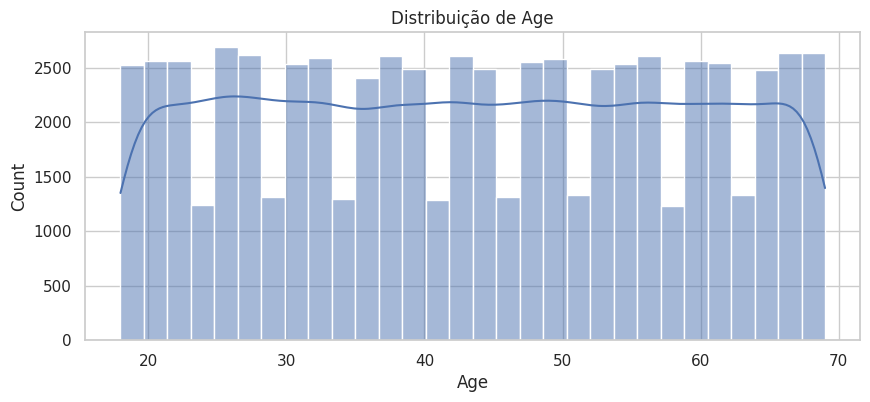

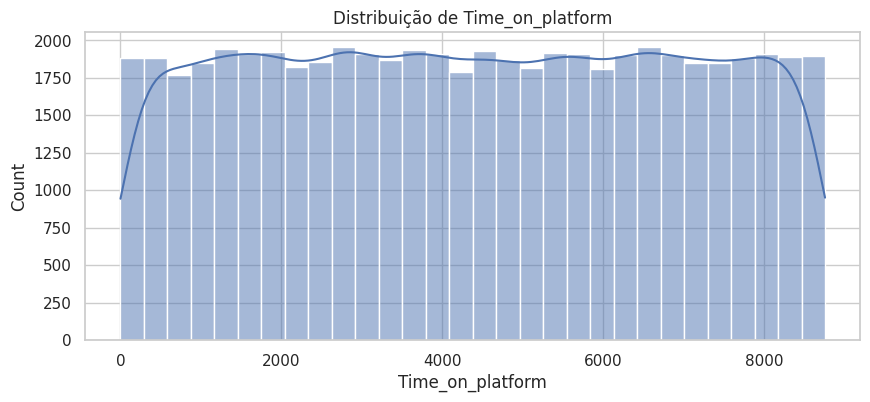

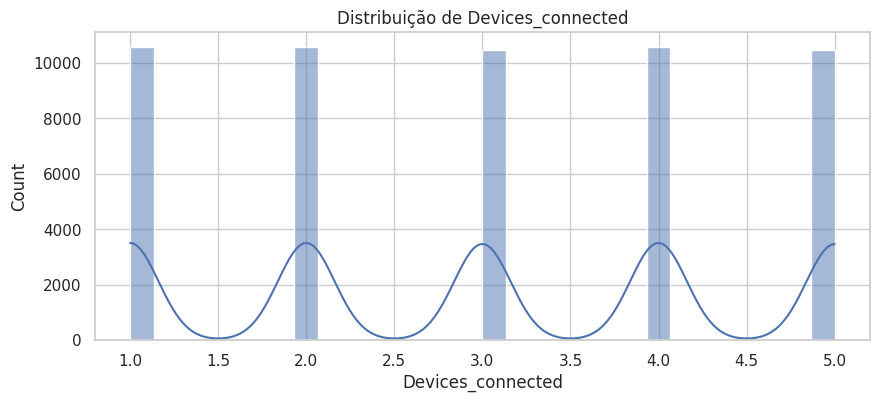

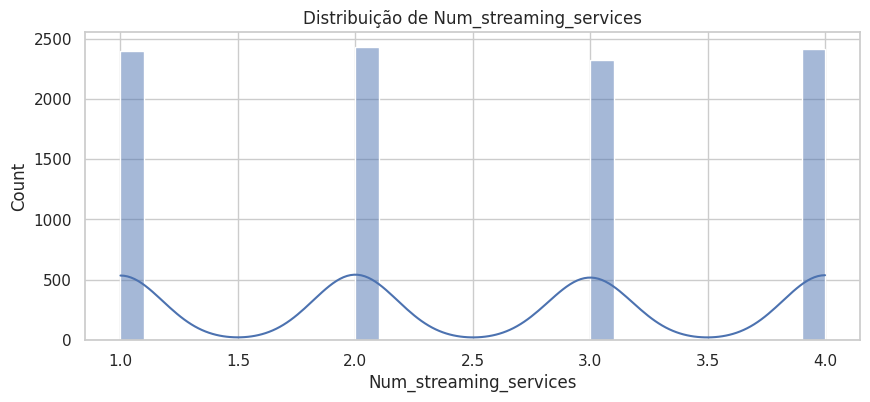

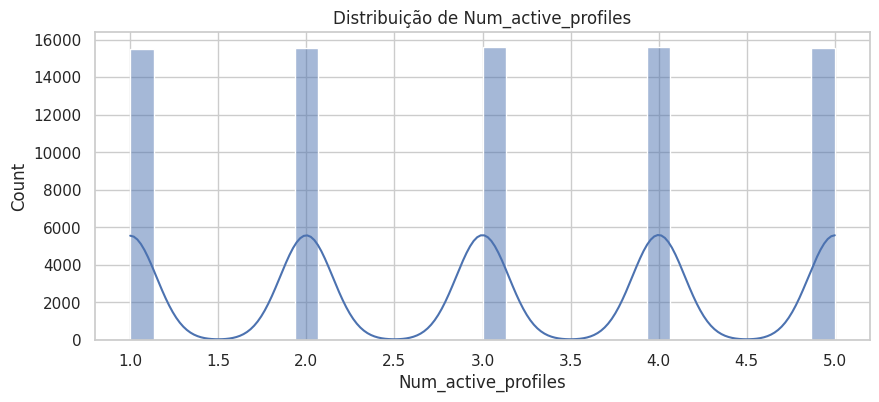

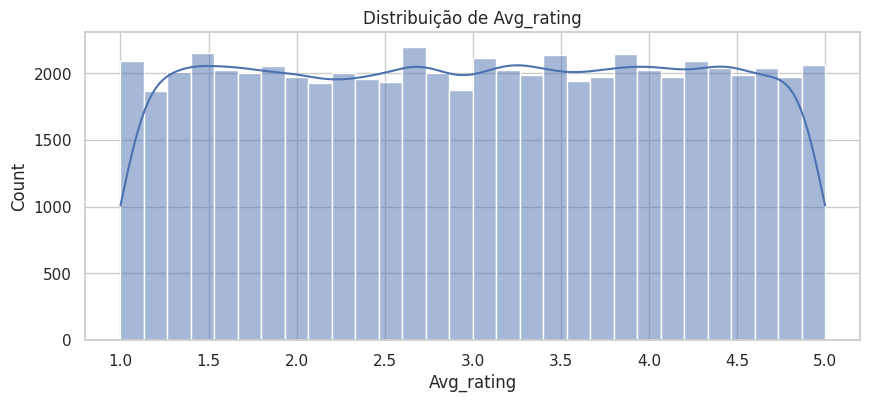

In [6]:
# Configurando o estilo dos gráficos
sns.set(style="whitegrid")

# Plotando a distribuição de variáveis numéricas
num_vars = ['Age', 'Time_on_platform', 'Devices_connected', 'Num_streaming_services', 'Num_active_profiles', 'Avg_rating']
for var in num_vars:
    plt.figure(figsize=(10, 4))
    sns.histplot(df[var], kde=True, bins=30)
    plt.title(f'Distribuição de {var}')
    plt.show()

- **Análise de Variáveis Categóricas**

- **Explicação:**

  - sns.countplot é usado para mostrar a contagem de observações em cada categoria usando barras.
  - Esse tipo de gráfico nos ajuda a entender a distribuição das categorias dentro de cada variável, como a proporção de gêneros, tipos de assinatura, e a proporção de churn.

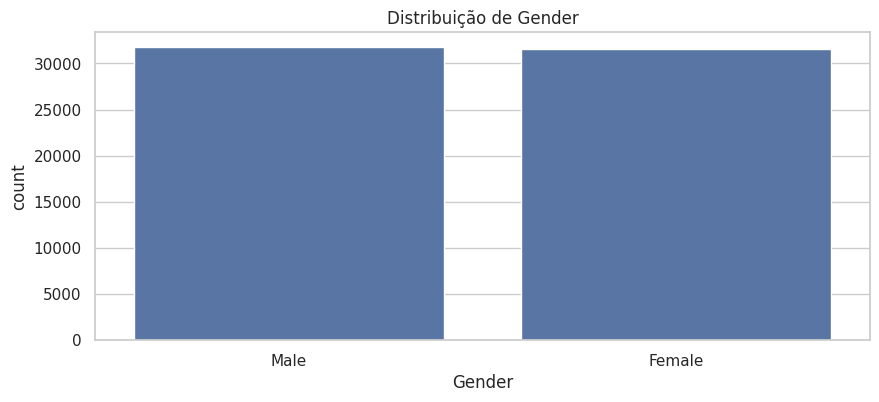

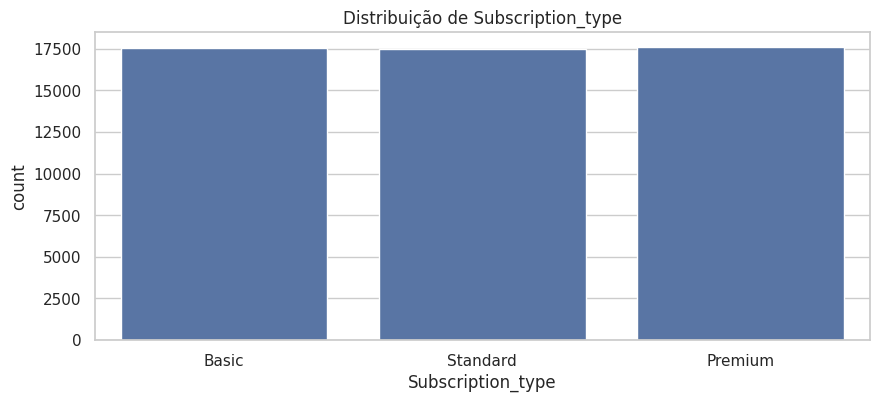

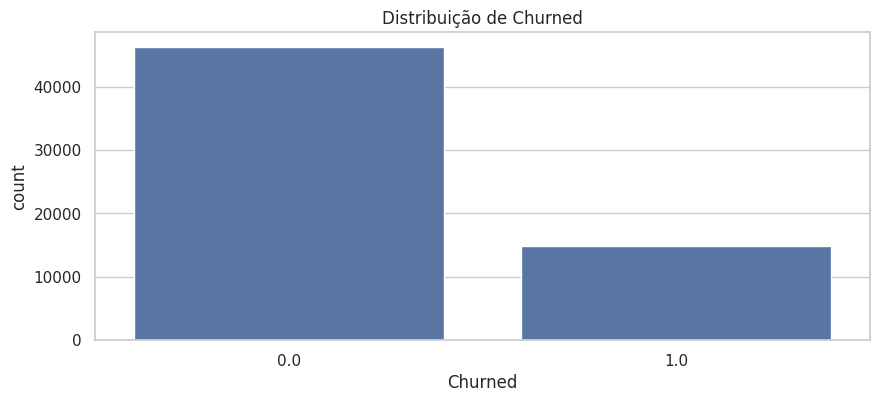

In [7]:
# Plotando a distribuição de variáveis categóricas
cat_vars = ['Gender', 'Subscription_type', 'Churned']
for var in cat_vars:
    plt.figure(figsize=(10, 4))
    sns.countplot(data=df, x=var)
    plt.title(f'Distribuição de {var}')
    plt.show()

- **Relações entre Variáveis**

- **Explicação:**

  - sns.boxplot é uma maneira eficaz de visualizar a distribuição de dados através de quartis, ao mesmo tempo em que mostra outliers.
  - Essas visualizações nos ajudam a compreender se variáveis como o tempo na plataforma ou a avaliação média têm algum impacto na probabilidade de churn.

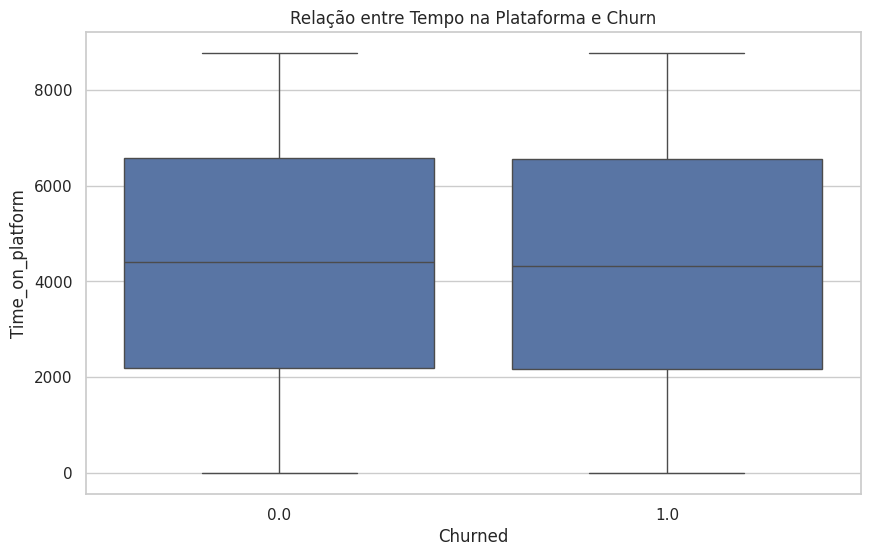

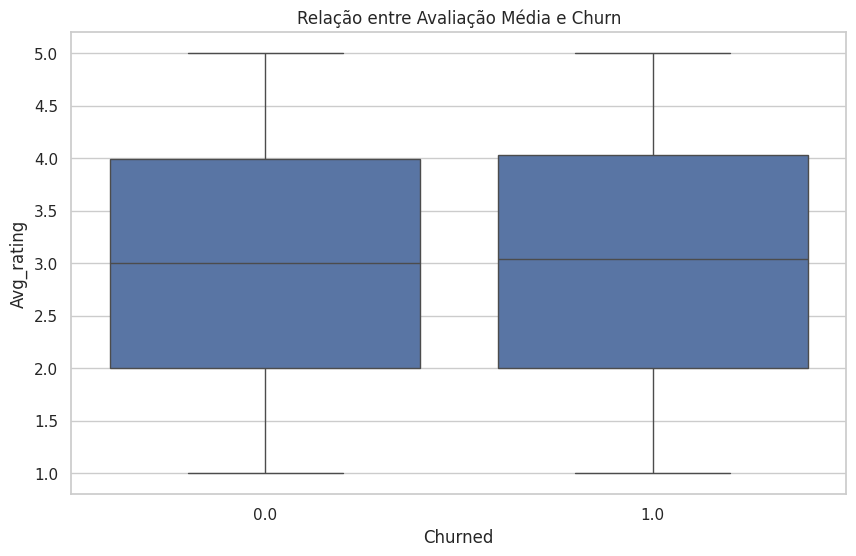

In [8]:
# Relação entre Tempo na Plataforma e Churn
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Churned', y='Time_on_platform')
plt.title('Relação entre Tempo na Plataforma e Churn')
plt.show()

# Relação entre Avaliação Média e Churn
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Churned', y='Avg_rating')
plt.title('Relação entre Avaliação Média e Churn')
plt.show()

# Etapa 02: Tratamento dos Dados (Data Preparation)

- **Substituição de Valores "NaN" por 0**:
Para colunas como Time_on_platform, Num_streaming_services, Churned, Avg_rating, e Devices_connected, vamos substituir os valores faltantes por 0. Isso pode ser feito utilizando a função .fillna() do pandas.

In [9]:
colunas_para_zero = ['Time_on_platform', 'Num_streaming_services', 'Churned', 'Avg_rating', 'Devices_connected']
df[colunas_para_zero] = df[colunas_para_zero].fillna(0)

- **Exclusão de Linhas Nulas:**
Nas colunas Gender, Subscription_type, e Age, vamos excluir as linhas que contêm valores nulos, já que a ausência desses dados pode indicar informações incompletas do usuário.

In [10]:
df.dropna(inplace=True)

- **Transformação de Valores de Churned:**
Vamos substituir os valores numéricos 0 e 1 na coluna Churned por "No" e "Yes", respectivamente. Isso transforma a coluna em um formato mais legível para análise.

In [11]:
df.loc[:, "Churned"] = df["Churned"].replace({0: "No", 1: "Yes"})

- **Conversão de Valores Floats em Inteiros:**
Para colunas que originalmente contêm valores float, mas que faz sentido serem representadas como inteiros (por exemplo, Age), vamos converter esses valores para o tipo inteiro.

In [12]:
colunas_para_int = ['Time_on_platform', 'Num_streaming_services', 'Devices_connected', 'Age']
df[colunas_para_int] = df[colunas_para_int].astype(int)

# Etapa 03: Modelagem dos Dados - Regressão Logística



 - Separação das variáveis independentes (X) e da variável alvo (y):

 Primeiro, precisamos definir as variáveis independentes (X) e a variável dependente (y). A variável dependente é 'Churned', enquanto as variáveis independentes serão as outras colunas, exceto 'User_id', que não contribui para a previsão.

In [13]:
# Removendo a coluna 'User_id' e a variável dependente 'Churned' de X
X = df.drop(['Churned', 'User_id'], axis=1)
y = df['Churned']

# Pré-processamento dos Dados
Para alimentar os dados em um modelo de Regressão Logística, precisamos garantir que todas as variáveis categóricas sejam convertidas em formatos numéricos. Além disso, é importante normalizar as variáveis para garantir que todas estejam na mesma escala.

- **Codificar Variáveis Categóricas:**
Para variáveis categóricas como 'Gender' e 'Subscription_type', usaremos pd.get_dummies() para convertê-las em variáveis dummy.

In [14]:
X = pd.get_dummies(X, drop_first=True)

- **OBS: **

eu optei usar diretamente por pd.get_dummies() para lidar com variáveis categóricas, o que é uma abordagem válida e comumente utilizada para transformar variáveis categóricas em um formato que modelos de machine learning podem entender. O pd.get_dummies() cria novas colunas indicadoras (ou "dummy") para cada categoria única em uma variável categórica, o que é especialmente útil para variáveis categóricas nominais onde não há ordem inerente entre as categorias.

O LabelEncoder, por outro lado, é uma abordagem que transforma cada categoria em um número. É mais adequado para variáveis categóricas ordinais, onde a ordem dos valores é importante. No entanto, pode ser usado antes de aplicar técnicas como OneHotEncoder ou diretamente em variáveis categóricas que serão usadas como labels em modelagem.

O motivo pelo qual eu não mencionei explicitamente o LabelEncoder nas etapas anteriores é que, para o contexto deste desafio, optei por uma solução que tratasse todas as variáveis categóricas de maneira uniforme, convertendo-as em variáveis dummy, o que evita potenciais mal-entendidos sobre a natureza ordinal das variáveis ao usar LabelEncoder.

No entanto, se estivéssemos lidando com uma variável categórica onde a ordem dos valores importa (por exemplo, uma classificação de 'baixo', 'médio', 'alto'), o LabelEncoder seria a escolha apropriada antes de proceder com a modelagem.

- **Normalizar os Dados:**
Usaremos MinMaxScaler para normalizar as variáveis independentes (X).

In [15]:
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

**- Dividir os Dados em Conjuntos de Treinamento e Teste:**
É importante avaliar o desempenho do modelo em dados não vistos, então dividiremos o dataset em conjuntos de treinamento e teste.

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

- **Construir e Treinar o Modelo de Regressão Logística:**
Agora, construiremos e treinaremos nosso modelo de Regressão Logística.

In [17]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

- **Avaliação do Modelo:**
Para avaliar o desempenho do nosso modelo, utilizaremos a matriz de confusão e outras métricas.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

          No       0.81      1.00      0.89      5900
         Yes       0.00      0.00      0.00      1403

    accuracy                           0.81      7303
   macro avg       0.40      0.50      0.45      7303
weighted avg       0.65      0.81      0.72      7303



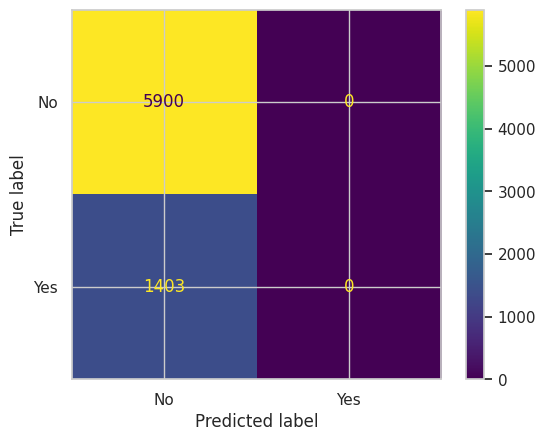

In [18]:
# Previsões
y_pred = model.predict(X_test)

# Matriz de Confusão
conf_matrix = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=model.classes_)
disp.plot()

# Relatório de Classificação
print(classification_report(y_test, y_pred))

# Etapa 04: Modelagem dos Dados - Tunning

O objetivo do tuning é encontrar a melhor configuração de parâmetros para nossos modelos. Isso é feito através de métodos como o Grid Search, que testa combinações de parâmetros e valida o desempenho usando, por exemplo, validação cruzada.

Tunning para Regressão Logística
Vamos realizar o tuning do modelo de Regressão Logística usando GridSearchCV para otimizar alguns de seus parâmetros.

In [19]:
# Definindo o espaço de parâmetros para a Regressão Logística
param_grid_lr = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100], # Regularização
    'solver': ['liblinear', 'lbfgs'] # Algoritmo para otimização
}

# Criando o objeto GridSearchCV
grid_search_lr = GridSearchCV(LogisticRegression(), param_grid_lr, cv=5, scoring='accuracy', n_jobs=-1)

# Fazendo o fit para encontrar os melhores parâmetros
grid_search_lr.fit(X_train, y_train)

# Melhores parâmetros e melhor score
print("Melhores Parâmetros: ", grid_search_lr.best_params_)
print("Melhor score de precisão: ", grid_search_lr.best_score_)

Melhores Parâmetros:  {'C': 0.001, 'solver': 'liblinear'}
Melhor score de precisão:  0.8064836401882584


# Etapa 5: Modelagem dos Dados - Random Forest

Nesta etapa, desenvolveremos um modelo de Random Forest, treinaremos com nossos dados e avaliaremos seu desempenho.

Primeiro, instanciamos o modelo de Random Forest.

Aqui, RandomForestClassifier é a classe do Scikit-Learn para Random Forest para problemas de classificação. O random_state=42 é usado para garantir a reprodutibilidade dos resultados.

In [20]:
random_forest_model = RandomForestClassifier(random_state=42)

Agora, treinamos o modelo com os conjuntos de treinamento:

In [21]:
random_forest_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

Após treinar o modelo, fazemos previsões no conjunto de teste e avaliamos o desempenho:

              precision    recall  f1-score   support

          No       0.85      0.99      0.91      5900
         Yes       0.85      0.26      0.39      1403

    accuracy                           0.85      7303
   macro avg       0.85      0.62      0.65      7303
weighted avg       0.85      0.85      0.81      7303



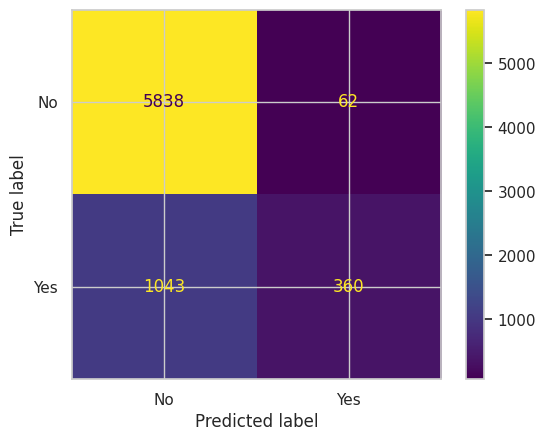

In [22]:
# Fazendo previsões
y_pred_rf = random_forest_model.predict(X_test)

# Matriz de Confusão
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
disp_rf = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_rf, display_labels=random_forest_model.classes_)
disp_rf.plot()

# Relatório de Classificação
print(classification_report(y_test, y_pred_rf))

Importância das Variáveis
Uma vantagem do Random Forest é sua capacidade de medir a importância de cada característica na decisão de classificação. Isso pode ser visualizado da seguinte maneira:

<Axes: >

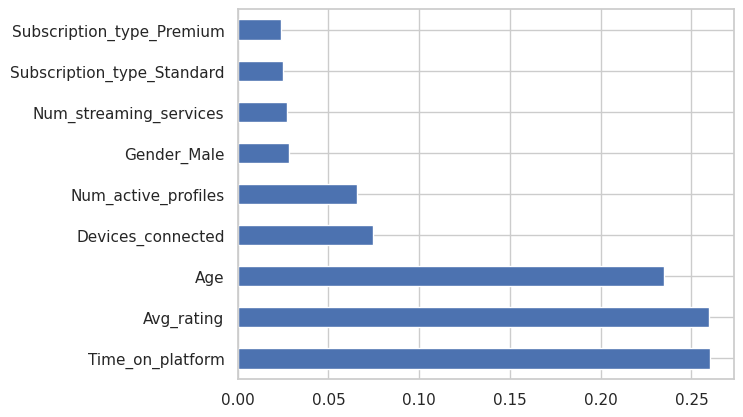

In [23]:
feature_importances = pd.Series(random_forest_model.feature_importances_, index=X.columns)
feature_importances.nlargest(10).plot(kind='barh')

- **Tunning para Random Forest**

In [24]:
# Definindo o espaço de parâmetros para o Random Forest
param_grid_rf = {
    'n_estimators': [50, 100, 200], # Número de árvores
    'max_features': ['auto', 'sqrt', 'log2'], # Número de features para considerar em cada split
    'max_depth' : [4,6,8,10] # Profundidade máxima da árvore
}

# Criando o objeto GridSearchCV
grid_search_rf = GridSearchCV(RandomForestClassifier(random_state=42), param_grid_rf, cv=5, scoring='accuracy', n_jobs=-1)

# Fazendo o fit para encontrar os melhores parâmetros
grid_search_rf.fit(X_train, y_train)

# Melhores parâmetros e melhor score
print("Melhores Parâmetros: ", grid_search_rf.best_params_)
print("Melhor score de precisão: ", grid_search_rf.best_score_)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


Melhores Parâmetros:  {'max_depth': 10, 'max_features': 'auto', 'n_estimators': 100}
Melhor score de precisão:  0.806586333023249


#  Técnicas Avançadas de Modelagem
**- XGBoost:**
XGBoost é uma implementação otimizada de gradient boosting que é conhecida por sua eficiência e desempenho.

In [32]:
from sklearn.preprocessing import LabelEncoder

# Instanciando o LabelEncoder
label_encoder = LabelEncoder()

# Ajustando e transformando 'y' para valores numéricos
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Agora, você pode treinar o modelo XGBoost com y codificado numericamente
xgb_model.fit(X_train, y_train_encoded)

# Avaliando o modelo com y codificado
y_pred_xgb = xgb_model.predict(X_test)
# Convertendo as previsões de volta para rótulos categóricos para a avaliação
y_pred_xgb_labels = label_encoder.inverse_transform(y_pred_xgb)

# Avaliação usando os rótulos categóricos originais para consistência
print(classification_report(y_test, y_pred_xgb_labels))

              precision    recall  f1-score   support

          No       0.81      0.99      0.89      5900
         Yes       0.51      0.04      0.07      1403

    accuracy                           0.81      7303
   macro avg       0.66      0.51      0.48      7303
weighted avg       0.75      0.81      0.73      7303



- **Curva ROC e AUC:**
Para avaliar os modelos usando a curva ROC e a área sob a curva (AUC):

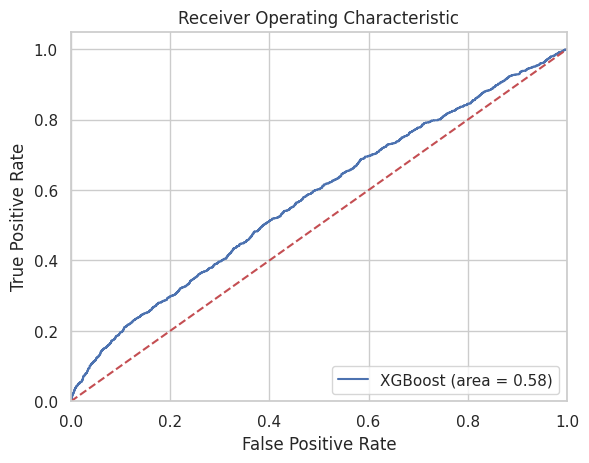

In [34]:
# Calculando AUC com y_test codificado
auc_encoded = roc_auc_score(y_test_encoded, xgb_model.predict_proba(X_test)[:, 1])

# Calculando pontos para a curva ROC com y_test codificado
fpr_encoded, tpr_encoded, thresholds_encoded = roc_curve(y_test_encoded, xgb_model.predict_proba(X_test)[:, 1])

# Plotando a curva ROC
plt.figure()
plt.plot(fpr_encoded, tpr_encoded, label='XGBoost (area = %0.2f)' % auc_encoded)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [36]:
!pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 535.7/535.7 kB 3.9 MB/s eta 0:00:00


- **SHAP Values**
Para explicar as previsões do modelo XGBoost utilizando SHAP:

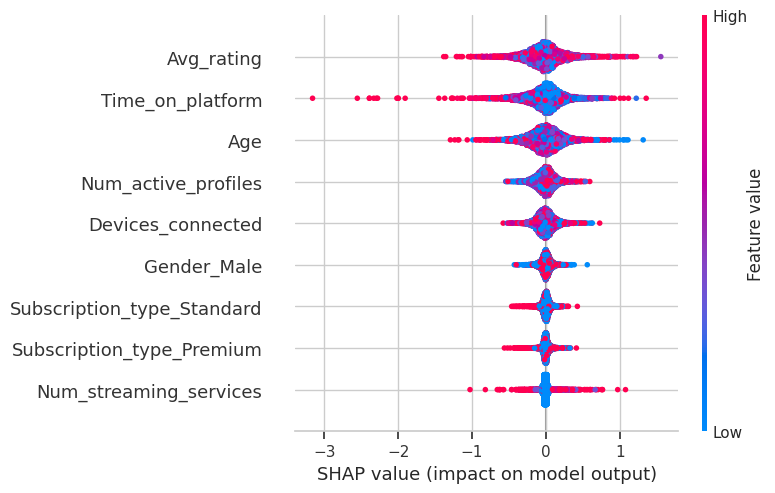

In [37]:
import shap

# Calculando SHAP values
explainer = shap.Explainer(xgb_model)
shap_values = explainer(X_test)

# Plotando um resumo dos SHAP values
shap.summary_plot(shap_values, X_test, feature_names=X.columns)


- **Grid Search para o XGBoost:**

In [38]:
# Definindo o espaço de parâmetros para o XGBoost
param_grid_xgb = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'colsample_bytree': [0.3, 0.7],
    'gamma': [0, 0.1, 0.2]
}

# Criando o objeto GridSearchCV
grid_search_xgb = GridSearchCV(
    estimator=XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    param_grid=param_grid_xgb,
    scoring='roc_auc',
    n_jobs=-1,
    cv=5,
    verbose=2
)

# Fazendo o fit para encontrar os melhores parâmetros
grid_search_xgb.fit(X_train, y_train_encoded)

# Melhores parâmetros e melhor score de AUC
print("Melhores Parâmetros: ", grid_search_xgb.best_params_)
print("Melhor score de AUC: ", grid_search_xgb.best_score_)

# Usando o melhor modelo para fazer previsões
best_xgb_model = grid_search_xgb.best_estimator_
y_pred_best_xgb = best_xgb_model.predict(X_test)

Fitting 5 folds for each of 162 candidates, totalling 810 fits
Melhores Parâmetros:  {'colsample_bytree': 0.7, 'gamma': 0, 'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 300}
Melhor score de AUC:  0.5690122752964952


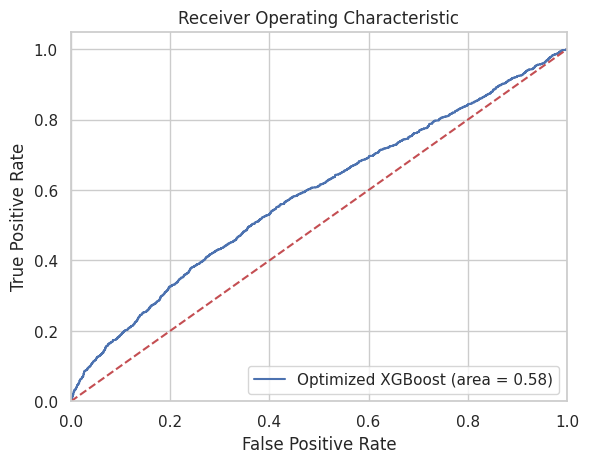

In [39]:
# Instanciando o modelo XGBoost com os melhores parâmetros encontrados
optimized_xgb_model = XGBClassifier(
    colsample_bytree=0.7,
    gamma=0,
    learning_rate=0.2,
    max_depth=5,
    n_estimators=300,
    use_label_encoder=False,
    eval_metric='logloss'
)

# Treinando o modelo otimizado
optimized_xgb_model.fit(X_train, y_train_encoded)

# Avaliando o modelo otimizado com a curva ROC
y_pred_optimized = optimized_xgb_model.predict_proba(X_test)[:, 1]
fpr_optimized, tpr_optimized, thresholds_optimized = roc_curve(y_test_encoded, y_pred_optimized)
auc_optimized = roc_auc_score(y_test_encoded, y_pred_optimized)

# Plotando a curva ROC otimizada
plt.figure()
plt.plot(fpr_optimized, tpr_optimized, label='Optimized XGBoost (area = %0.2f)' % auc_optimized)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()